In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image

2022-03-25 22:42:48.795334: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


(None, 512)
(None, 64)
(None, 64)
(None, 64)
(None, 704)


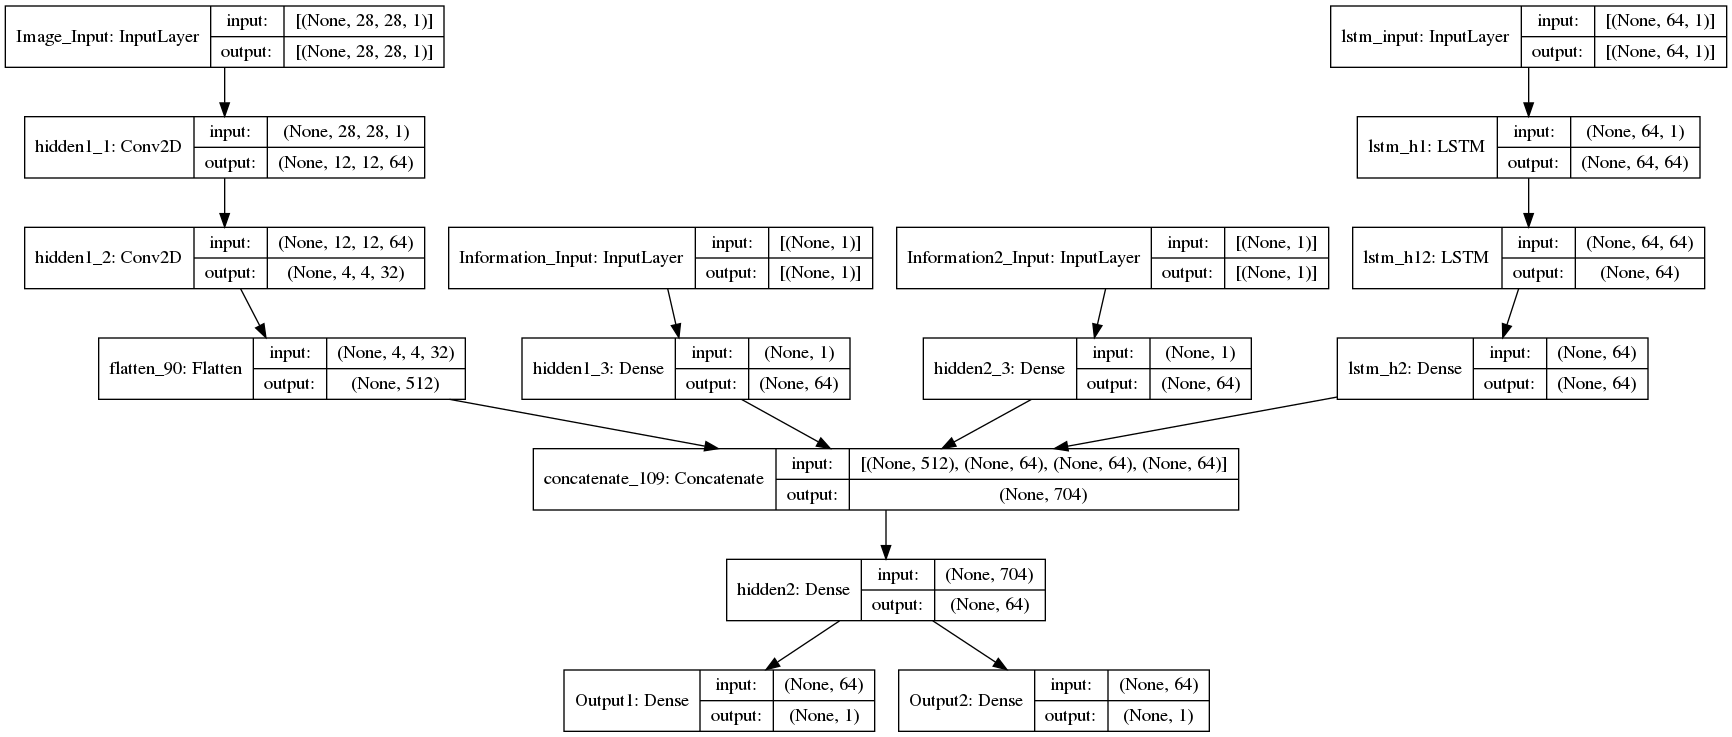

In [198]:
img_input = keras.Input(shape=(28, 28, 1), name='Image_Input')
hidden1_1 = layers.Conv2D(64, kernel_size=5, strides=2, activation='relu', name='hidden1_1')(img_input)
hidden1_2 = layers.Conv2D(32, kernel_size=5, strides=2, activation='relu', name='hidden1_2')(hidden1_1)
hidden1_2_ft = layers.Flatten()(hidden1_2)
print(hidden1_2_ft.shape)

info_input = keras.Input(shape=(1, ), name='Information_Input')
hidden1_3 = layers.Dense(64, activation='relu', name='hidden1_3')(info_input)
print(hidden1_3.shape)

info2_input = keras.Input(shape=(1, ), name='Information2_Input')
hidden2_3 = layers.Dense(64, activation='relu', name='hidden2_3')(info2_input)
print(hidden2_3.shape)

lstm_input = keras.Input(shape=(64, 1), name='lstm_input')
lstm_h1 = layers.LSTM(64, return_sequences=True, name='lstm_h1')(lstm_input)
lstm_h12 = layers.LSTM(64, name='lstm_h12')(lstm_h1)
lstm_h2 = layers.Dense(64, activation='relu', name='lstm_h2')(lstm_h12)
print(lstm_h2.shape)
# lstm_h3 = layers.Flatten(name="lstm_h3")(lstm_h12)

concat = layers.Concatenate(axis=1)([hidden1_2_ft, hidden1_3, hidden2_3, lstm_h2])
print(concat.shape)
hidden2 = layers.Dense(64, activation='relu', name='hidden2')(concat)

output1 = layers.Dense(1, name='Output1')(hidden2)
output2 = layers.Dense(1, name='Output2')(hidden2)

model = keras.Model(inputs=[img_input, info_input, info2_input, lstm_input], outputs=[output1, output2])

# 產生網絡拓撲圖
plot_model(model, show_shapes=True)

Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_mar_and_ear (InputLayer)  [(None, 600, 2)]     0                                            
__________________________________________________________________________________________________
conv1d_41 (Conv1D)              (None, 600, 64)      448         input_mar_and_ear[0][0]          
__________________________________________________________________________________________________
max_pooling1d_41 (MaxPooling1D) (None, 300, 64)      0           conv1d_41[0][0]                  
__________________________________________________________________________________________________
input_entropy (InputLayer)      [(None, 1)]          0                                            
___________________________________________________________________________________________

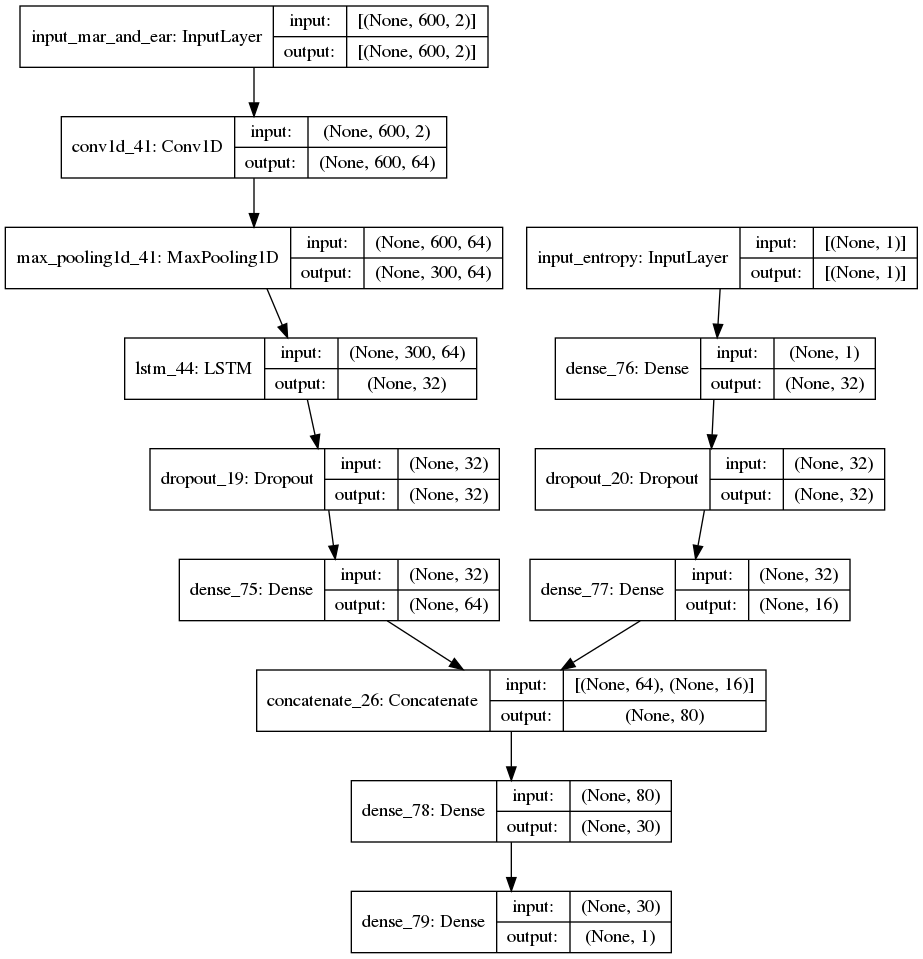

In [98]:
input_1 = keras.Input(shape=(600, 2), name='input_mar_and_ear')
hidden_1 = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(input_1)
hidden_1 = layers.MaxPooling1D(pool_size=2, padding='valid')(hidden_1)
hidden_1 = layers.LSTM(32, activation="tanh")(hidden_1)
hidden_1 = layers.Dropout(0.2)(hidden_1)
hidden_1 = layers.Dense(64, activation="relu")(hidden_1)

input_2 = keras.Input(shape=(1, ), name='input_entropy')
hidden_2 = layers.Dense(32, activation="relu")(input_2)
hidden_2 = layers.Dropout(0.2)(hidden_2)
hidden_2 = layers.Dense(16, activation="relu")(hidden_2)

concat = layers.Concatenate(axis=-1)([hidden_1, hidden_2])
concat_h1 = layers.Dense(30, activation='relu')(concat)
output = layers.Dense(1)(concat_h1)

model = keras.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()
plot_model(model, show_shapes=True)

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_mar (InputLayer)          [(None, 600, 1)]     0                                            
__________________________________________________________________________________________________
input_ear (InputLayer)          [(None, 600, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_39 (Conv1D)              (None, 600, 32)      128         input_mar[0][0]                  
__________________________________________________________________________________________________
conv1d_40 (Conv1D)              (None, 600, 32)      128         input_ear[0][0]                  
___________________________________________________________________________________________

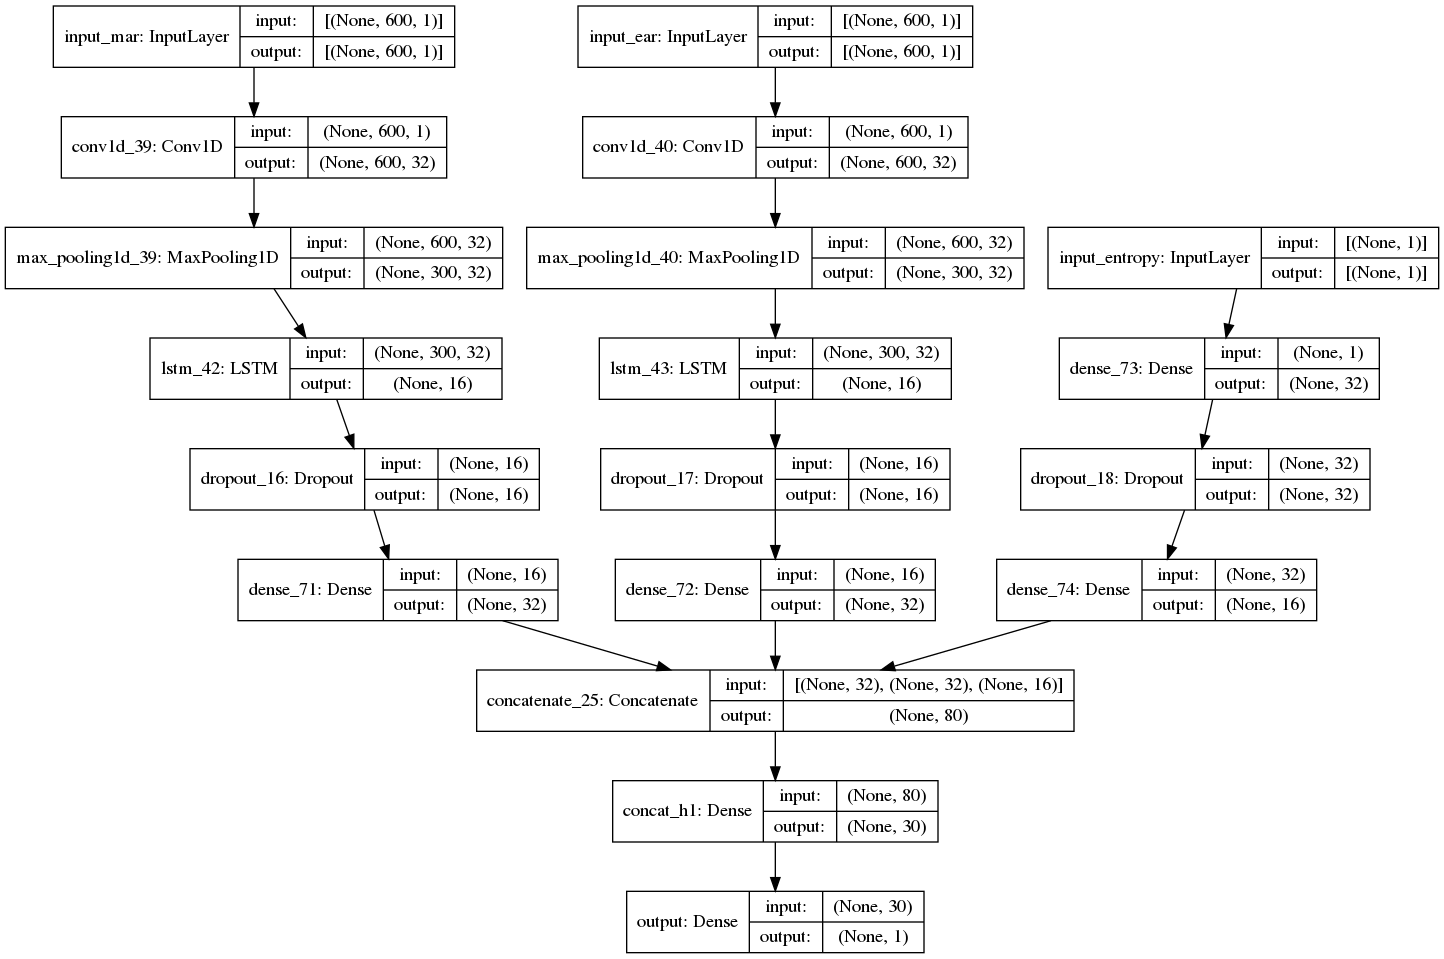

In [97]:
input_1 = keras.Input(shape=(600, 1), name='input_mar')
hidden_1 = layers.Conv1D(32, kernel_size=3, padding='same', activation='relu')(input_1)
hidden_1 = layers.MaxPooling1D(pool_size=2, padding='valid')(hidden_1)
hidden_1 = layers.LSTM(16, activation="tanh")(hidden_1)
hidden_1 = layers.Dropout(0.2)(hidden_1)
hidden_1 = layers.Dense(32, activation="relu")(hidden_1)

input_2 = keras.Input(shape=(600, 1), name='input_ear')
hidden_2 = layers.Conv1D(32, kernel_size=3, padding='same', activation='relu')(input_2)
hidden_2 = layers.MaxPooling1D(pool_size=2, padding='valid')(hidden_2)
hidden_2 = layers.LSTM(16, activation="tanh")(hidden_2)
hidden_2 = layers.Dropout(0.2)(hidden_2)
hidden_2 = layers.Dense(32, activation="relu")(hidden_2)

input_3 = keras.Input(shape=(1, ), name='input_entropy')
hidden_3 = layers.Dense(32, activation="relu")(input_3)
hidden_3 = layers.Dropout(0.2)(hidden_3)
hidden_3 = layers.Dense(16, activation="relu")(hidden_3)

concat = layers.Concatenate(axis=-1)([hidden_1, hidden_2, hidden_3])
concat_h1 = layers.Dense(30, activation='relu', name='concat_h1')(concat)
output = layers.Dense(1, name='output')(concat_h1)

model = keras.Model(inputs=[input_1, input_2, input_3], outputs=[output])
model.summary()
plot_model(model, show_shapes=True)